# DBSCAN (밀도 기반 클러스터링)

## DBSCAN: Density-based spetial clustering of applications with noise

기존의 K-Means, Hierarchical 클러스터링 -> 군집간의 거리를 이용하는 클러스터링   
DBSCAN은 점이 얼마나 세밀하게 몰료있는지 (밀도가 높은지)롤 보고 군집을 인식한다.   

    - ex) 어느 점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식   



## 기본개념

점 p로부터 거리 e (epsilon)내에 점이 m (minPts) 개 있으면 하나의 군집으로 인식한다고 가정할 때   
이때의 점 p를 core point (중심점)이라고 한다.

만약 점P를 기반으로 epsilon내의 점이 minPts에 미치지 못한다면 core point는 되지 못하지만,   
앞으로 점 P를 corepoint로 하는 군집에는 속하므로 이를 boder point (경계점)이라고 한다.

만약 P를 corepoint로 하는 군집에서 다른 corepoint가 있으면 두 점은 연결되어 있다고 하고 하나의 군집으로 묶이게 된다.

어떤 점을 중심으로 하더라도 군집에 묶이지 않는 점은 어느 군집에도 속하지 않는 outlier가 되는데, 이 점을 noise point라고 한다.

## 장점

    - K-means 같이 클러스터의 수를 정하지 않아도 됨
    - 클러스터의 밀도에 따라 서로를 연결하기 때문에 기하학적 모양의 군집도 잘 찾아 냄
    - noise point를 통해 outlier 검출이 가능

## Epsilon and minPts

Epsilon과 minPts를 잘못 설정하면 클러스터의 갯수의 오차가 생기거나 분류가 잘못될 수 있음

### minPts

- MinPts는 값이 커질수록 연산량이 상당히 커지므로 2차원데이터에서는 4개로 하는것을 권장하고 있음
- 대체적으로 데이터셋별 객체 개수 n의 특성을 감안해서 ln(n) 값을 사용하기도 함 (n=데이터 갯수)
- iris 데이터에서 n=150, ln(150) == 5.01이므로 5라고 가정하고 접근하겠다.

### Epsilon

- 값이 클경우 하나의 클러스터가 될수 있고 값이 작으면 noise point가 많이 생김

In [351]:
import pandas as pd #행렬
import urllib.request as req # web download request
import matplotlib.pyplot as plt # 그래프
import os 
from sklearn.preprocessing import StandardScaler # 스케일링
from sklearn.preprocessing import Normalizer # 스케일링
from sklearn.decomposition import PCA # 주성분분석 - 차원 축소
from sklearn.cluster import DBSCAN # DBSCAN clustering

In [352]:
DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
DATA_PATH = os.path.join('data') # data save folder
ColumnList = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class'] # iris data의 Column List

In [353]:
def fetch_iris_data(): # data 폴더와 iris의 데이터 csv 파일 생성
    if not os.path.isdir(DATA_PATH):
        os.makedirs(DATA_PATH)
    csv_path = os.path.join(DATA_PATH,'iris.csv')
    if not os.path.isfile(csv_path):
        req.urlretrieve(DOWNLOAD_ROOT, csv_path)

def load_iris_data(): # iris data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'iris.csv')
    return pd.read_csv(csv_path, names=ColumnList)

In [354]:
fetch_iris_data()
iris = load_iris_data()

ClassList = iris['class'].unique() #class의 List (꽃 종류)
feature = iris.iloc[:,:4] # 이전에 sepal 관련 열만 찾아봤었지만 모든 요소를 볼수 있도록 수정
feature

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 데이터 전처리
 
 - 데이터 전처리를 하는 이유: 각 축의 값들은 항상 다르기 때문에 그 간격에 차이가 날수 밖에 없음, 그래서 어떤 축의 값이 그래프상으로는 가깝더라도   
 실제로는 굉장히 먼거리 일 수 있음 즉 그것의 각 축의 편차의 크기를 줄이기 위한 수단 중 하나로 생각 할 수 있다.


In [355]:
scaler = StandardScaler()
result = scaler.fit_transform(feature)
result = pd.DataFrame(result,columns=ColumnList[:4])
result

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [356]:
pca = PCA(n_components=2)
result = pca.fit_transform(result)
result = pd.DataFrame(result, columns=['x','y'])

In [357]:
# create model and prediction
model = DBSCAN(eps=0.4,min_samples=5) # 거리 0.3, 주변 밀집도 6으로 설정
predict = pd.DataFrame(model.fit_predict(result))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([result,predict],axis=1)
r

,x,y,predict
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0
...,...,...,...
145,1.870522,0.382822,1
146,1.558492,-0.905314,1
147,1.520845,0.266795,1
148,1.376391,1.016362,1


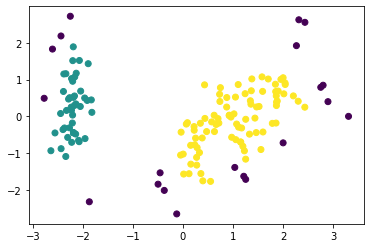

In [358]:
plt.scatter(r['x'],r['y'],c=r['predict'])

In [359]:
ct = pd.crosstab(r['predict'], iris['class'])
ct

class,Iris-setosa,Iris-versicolor,Iris-virginica
predict,,,
-1,5,6,9
0,45,0,0
1,0,44,41


### eps의 값을 계속 조정해 봐도 제대로된 clustering이 어려움 -> 스케일링 방식 변경

In [360]:
scaler = Normalizer()
result = scaler.fit_transform(feature)
result = pd.DataFrame(result, columns=ColumnList[:4])
result

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [361]:
pca = PCA(n_components=2)
result = pca.fit_transform(result)
result = pd.DataFrame(result, columns=['x','y'])

In [371]:
# create model and prediction
model = DBSCAN(eps=0.1,min_samples=5) # 거리 0.3, 주변 밀집도 6으로 설정
predict = pd.DataFrame(model.fit_predict(result))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([result,predict],axis=1)
r

,x,y,predict
0,0.301887,-0.000600,0
1,0.271296,0.040982,0
2,0.297934,0.001074,0
3,0.262920,0.001611,0
4,0.307660,-0.019957,0
...,...,...,...
145,-0.165253,-0.020430,1
146,-0.184989,0.018118,1
147,-0.162750,-0.016320,1
148,-0.172966,-0.081527,1


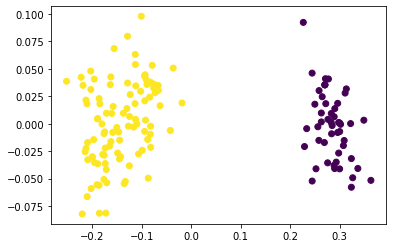

In [372]:
plt.scatter(r['x'],r['y'],c=r['predict'])